Description:

We work with the housing data set from California (1990) and try to find a model that best describes median house values. 


In [216]:
#Packages used in housing.ipynb

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
import dill as pickle

In [142]:
# Print versions of packages used

print('Pandas version: %s' %pd.__version__)
print('Numpy version: %s' %np.__version__)
print('Matplotlib version: %s' %mpl.__version__)
print('Sklearn version: %s' %sklearn.__version__)


Pandas version: 1.4.2
Numpy version: 1.21.5
Matplotlib version: 3.5.1
Sklearn version: 1.0.2


In [143]:
# Import the housing dataset
housing = pd.read_csv("D:\Github\housing\housing.csv")

In [144]:
type(housing)

pandas.core.frame.DataFrame

Exploratory data analysis

In [145]:
# Print the first 10 rows of housing dataframe
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [146]:
# Finds shape of housing
housing.shape

(20640, 10)

In [147]:
# Columns of housing
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

This reveals that there are 10 columns and 20, 640 rows. The column names are

'longitude', 'latitude', 'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households', 'median_income',
'median_house_value', 'ocean_proximity'].


In [148]:
# Counts non-null entries in each column, prints type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Clearly, there are some values missing in the total_bedrooms category.

In [149]:
# Display statistics of entries in each column with numerical attributes
# e.g mean, median, mode, min, max etc.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


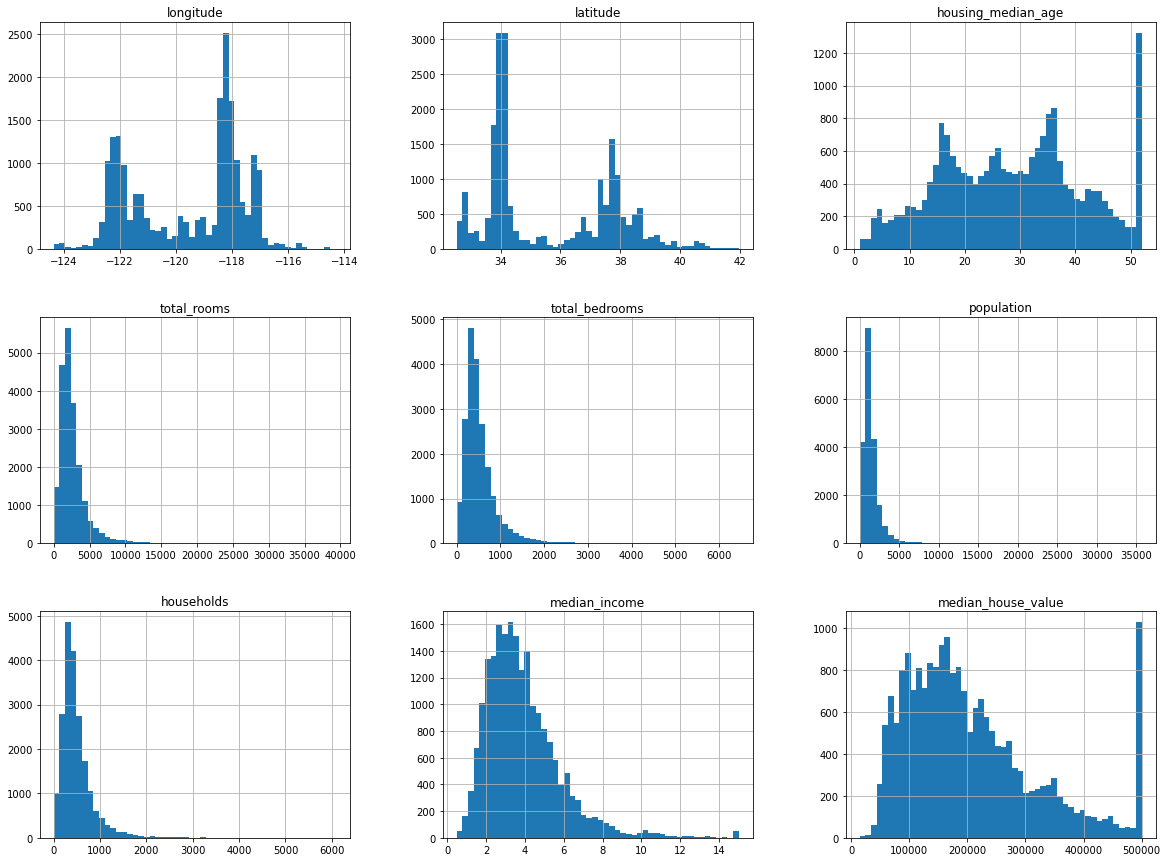

In [150]:
housing.hist(bins =50, figsize= (20,15))

plt.show()

In [151]:
# Splits data into 80-20 for training and testing.
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42) 

In [152]:
test_set.shape

(4128, 10)

In [153]:
train_set.shape

(16512, 10)

In [154]:
# np.inf = floating point representation of infinity
# split into different income categories
housing["income_cat"] =pd.cut(housing["median_income"],
                             bins = [0., 1.5, 3.0, 4.5, 6. , np.inf],
                             labels = [1, 2, 3, 4, 5]) 

<AxesSubplot:xlabel='Income Categories', ylabel='Number of Datapoints'>

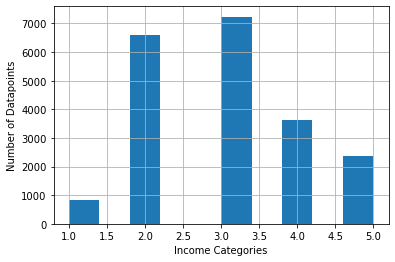

In [155]:
plt.xlabel('Income Categories')
plt.ylabel('Number of Datapoints')
housing["income_cat"].hist()

In [156]:
# Shuffle data
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index] 

In [157]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [158]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [159]:
# Check that the strat_train_set is clean with no missing entries
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [160]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


The above line reveals that the test set has entries missing in the total_bedrooms column.

In [161]:
# We just store a copy of stratified shuffled training set as housing
housing = strat_train_set.copy() 

In [162]:
# Correlation matrix
corr_matrix = housing.corr() 

In [163]:
# Correlation of different columns with median_housing_value
corr_matrix["median_house_value"]

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

Median house value seems to be very strongly correlated to median_income. The following scatter plot captures
such a correlation.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

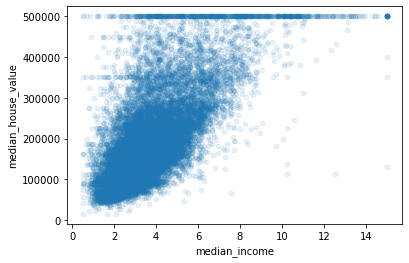

In [164]:
housing.plot(kind = "scatter", x= "median_income", y = "median_house_value", alpha = 0.1)

In [165]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [166]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False) #sort values in descending order

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [167]:
housing = strat_train_set.drop("median_house_value", axis = 1)#drops the median_house_value column
housing_labels = strat_train_set["median_house_value"].copy()

In [168]:
# Print housing_labels
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [169]:
"""
We would like to use imputer to replace missing values of numerical attributes in a column
by median of the attributes in that column
"""

# Invoke imputer
imputer = SimpleImputer(strategy = "median") 

In [170]:
# Drops ocean proximity.
# Reason: Imputer works on columns with float attribute
housing_num = housing.drop("ocean_proximity", axis = 1)

In [171]:
housing_num 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3


In [172]:
# Fit imputer to housing_num
imputer.fit(housing_num) 

SimpleImputer(strategy='median')

These are the values that the imputer comes up with.

In [173]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [174]:
# Transformed after use of imputer
X = imputer.transform(housing_num)

In [175]:
# Put back into DataFrame
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index) #put all this back into a dataframe

In [176]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0


In [177]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [178]:
# Shows how many different values of ocean_proximity occur how many times
housing.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

This reveals that there are 5 different types of ocean proximity in the table. We use the One Hot Encoder to encode
this information into sparse matrices that capture this information.

In [179]:
# Invoke OneHotEncoder
cat_encoder = OneHotEncoder()

In [180]:
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot= cat_encoder.fit_transform(housing_cat) # Use the one-hot encoder
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [181]:
# Prints results of one-hot encoding 
# Output is an array of 0s and 1s. 
# Each row has exactly one 1. The rest of entries are 0.
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [182]:
# Verify that housing_cat_1hot is indeed a sparse matrix
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [183]:
# Define housing_prep
housing_prep = housing_tr
housing_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0


In [184]:
# Add the columns resulting from one-hot encoding to housing_prep
housing_prep[cat_encoder.categories_[0]] = housing_cat_1hot.toarray()

In [185]:
housing_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0,1.0,0.0,0.0,0.0,0.0


In [186]:
"""
Although we have manually prepared the test set, 
we use the sklearn pipeline instead in practise as follows.
The sklearn pipeline does all the necessary transformations to the training (and later test) set. 
It imputes numerical values and one-hot encodes categorical attributes. It also uses the standard scaler.
"""



# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

#attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [187]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),    
])

In [188]:

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),  
    
])

#The following is the housing training set, fully cleaned and prepared
housing_prepared = full_pipeline.fit_transform(housing) 

In [189]:
#invoke linear regression
lin_reg = LinearRegression()  

In [190]:
# Linear regression fit
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Here, we measure this model's RMSE on the whole training set.


In [191]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) #computes RMSE (root mean squared error)

In [192]:
lin_rmse #this will turn out to be very (unacceptably) large

68376.51254853733

In [193]:
# Use decision tree regressor on housing_prepared
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [194]:
housing_predictions1 = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions1)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse) #No error! Did this model overfit the data?

0.0


In [195]:
# Compute print cross-validation scores for decision tree regressor
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring = "neg_mean_squared_error", cv= 10) 
tree_rmse_scores = np.sqrt(-scores) 

In [196]:
# print cross-validation scores for decision tree regressor
print(tree_rmse_scores)

[73277.6232244  70449.55527394 67822.62255882 70936.3246031
 69676.99266965 76261.72523358 70250.36160962 74270.30482205
 68049.0277262  71979.96782059]


In [197]:
# Compute cross-validation scores for linear regressor
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                        scoring = "neg_mean_squared_error", cv= 10)
lin_rmse_scores = np.sqrt(-lin_scores) 

In [198]:
# Print cross-validation scores for linear regressor
print(lin_rmse_scores)

[71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]


In [199]:
# Using random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42) 
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [200]:
# Compute RMSE for the random forest regressor
housing_predictions2 = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions2)
forest_rmse = np.sqrt(forest_mse)

In [201]:
print(forest_rmse)

22367.815456232496


In [202]:
"""
The GridSearchCV is used for finding out the best combination of hyper-parameter values. 
We use 5-fold cross validation. 
"""

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features' : [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [203]:
# Prints max_features and n_estimators for GridSearchCV applied on Random Forest Regression
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [204]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [205]:
feature_importances

array([6.59167958e-02, 5.79101183e-02, 4.34922555e-02, 1.66580659e-02,
       1.53569440e-02, 1.51282161e-02, 1.48242160e-02, 3.14014636e-01,
       1.25196336e-01, 3.75679426e-02, 1.08798135e-01, 2.94891102e-02,
       1.13201156e-02, 1.36901493e-01, 1.23348942e-04, 3.06055696e-03,
       4.24171502e-03])

In [206]:
"""
Error analysis. This reveals the importance scores of each of the attributes.
We can thus decide which features to drop (for example, island).
"""

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
num_attribs = list(housing_num)
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs 
sorted(zip(feature_importances, attributes), reverse = True)

[(0.31401463558663656, 'median_income'),
 (0.13690149252225833, 'INLAND'),
 (0.12519633579319725, 'income_cat'),
 (0.10879813528648223, 'pop_per_hhold'),
 (0.06591679575168988, 'longitude'),
 (0.05791011826733721, 'latitude'),
 (0.04349225548815069, 'housing_median_age'),
 (0.03756794264732921, 'rooms_per_hhold'),
 (0.02948911022755827, 'bedrooms_per_room'),
 (0.016658065859004034, 'total_rooms'),
 (0.015356944018639688, 'total_bedrooms'),
 (0.015128216102469713, 'population'),
 (0.014824215973327753, 'households'),
 (0.01132011555354903, '<1H OCEAN'),
 (0.0042417150243114375, 'NEAR OCEAN'),
 (0.003060556955998014, 'NEAR BAY'),
 (0.0001233489420608628, 'ISLAND')]

In [207]:
# Test set transformed using sklearn pipeline

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [208]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48257.55354614485


In [209]:
# Compute a 95% confidence interval for the rmse


from scipy import stats
confidence = 0.95

squared_errors = (final_predictions -y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc= squared_errors.mean(),scale = stats.sem(squared_errors)))

array([46255.99339076, 50179.33861613])

Therefore, I choose to go with the random forest regressor.

In [210]:
final_model

RandomForestRegressor(max_features=8, n_estimators=30)

Now we packages the model and the feature transformation pipeline into a dictionary, and to prepare it for deployment. 
Saving the feature transformation pipeline into the dictionary is needed to ensure we have the ability to 
accurately transform the data that will come from a user into a feature vector that can then be fed into the model.

In [220]:
model_dict = {'model': final_model, 'pipeline': full_pipeline}

In [222]:
pickle.dump(model_dict, open('model_dict.pkl', 'wb'))

In [223]:
model_dict2 = pickle.load(open('model_dict.pkl', 'rb'))

In [229]:
z = model_dict2['pipeline'].transform(X_test.sample(1))
z

array([[-0.44179193, -0.46742848, -1.40391195, -0.96361098, -0.90054772,
        -0.82078108, -0.93166353, -0.97632989, -0.95468705, -0.61926261,
         0.02866787,  1.19550904,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

In [228]:
model_dict2['model'].predict(z)

array([117910.])